# BERT裁剪

采用训练数据链接：

https://huggingface.co/datasets/hw2942/financial-news-sentiment

0:Negative, 1:Neutral, 2:Positive

huggingface模型链接：

https://huggingface.co/hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2

In [65]:
import torch 
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from textpruner import TransformerPruner

# Load model directly
tokenizer = AutoTokenizer.from_pretrained("hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2")
model = AutoModelForSequenceClassification.from_pretrained("hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2",output_attentions=True)

# load the dataset 
ds = load_dataset("hw2942/financial-news-sentiment")


d:\Python\lib\site-packages\transformers\modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cpu")
d:\Pytho

In [29]:
n = 0  # 第1层（索引从0开始）
attention_layer = model.bert.encoder.layer[n].attention.self
# 多头中的所有权重会被打包在一起，m 是你感兴趣的头的索引
heads_Q_weight = attention_layer.query.weight  # 例如这里访问 query 的权重
heads_Q_weight.shape

torch.Size([768, 768])

In [10]:
import torch

inputs = tokenizer(ds['train'][0]['Title'],return_tensors='pt')
outputs = model(**inputs)

# 获取模型的输出
sequence_output = outputs.logits  # 分类模型的logits输出

# 选择一个标量输出，例如logits的L2范数
loss = torch.norm(sequence_output)

# 反向传播前清除梯度
model.zero_grad()  # 确保每次反向传播前梯度为零

# 保持计算图以便后续可以再次使用
loss.backward(retain_graph=True)

# 打印出对head_weight的梯度
print(heads_Q_weight.grad,heads_Q_weight.grad.size())

tensor([[ 5.7181e-04,  1.6097e-04, -8.2610e-04,  ...,  3.3229e-04,
         -4.7372e-04,  5.0043e-04],
        [-8.2390e-05,  4.5101e-04,  4.1507e-04,  ..., -2.2643e-04,
          2.8777e-04,  4.1227e-05],
        [ 1.9445e-04,  1.0557e-04,  6.6730e-04,  ...,  1.2498e-04,
         -8.1389e-04,  2.1818e-03],
        ...,
        [ 3.0416e-04,  5.4775e-05, -4.6295e-04,  ...,  3.0760e-04,
         -1.2061e-04, -8.1021e-04],
        [ 6.8528e-04,  3.2869e-04, -9.6820e-04,  ...,  1.0962e-03,
         -7.8020e-04, -1.4448e-05],
        [ 9.4563e-05, -8.5372e-04,  6.4145e-04,  ...,  5.2069e-04,
         -6.2215e-05,  9.0355e-04]]) torch.Size([768, 768])


In [11]:
n = 0  # 第1层（索引从0开始）
attention_layer = model.bert.encoder.layer[n].attention.self
# 多头中的所有权重会被打包在一起，m 是你感兴趣的头的索引
heads_K_weight = attention_layer.key.weight  # 例如这里访问 query 的权重
heads_K_weight

Parameter containing:
tensor([[-0.0273,  0.1050, -0.0095,  ..., -0.0078,  0.0404,  0.0776],
        [-0.0183, -0.0544,  0.0373,  ..., -0.0319,  0.0294, -0.0201],
        [-0.0079,  0.0226, -0.0045,  ...,  0.0351,  0.0558, -0.0323],
        ...,
        [-0.0186, -0.0765,  0.0283,  ..., -0.0151, -0.0114,  0.0202],
        [-0.0272,  0.0347,  0.0496,  ..., -0.0127, -0.0020,  0.0714],
        [ 0.0173,  0.0671, -0.0208,  ...,  0.0115,  0.0261,  0.0119]],
       requires_grad=True)

In [21]:
import torch

inputs = tokenizer(ds['train'][0]['Title'],return_tensors='pt')
outputs = model(**inputs)

# 获取模型的输出
sequence_output = outputs.logits  # 分类模型的logits输出

# 选择一个标量输出，例如logits的L2范数
loss = torch.norm(sequence_output)

# 反向传播前清除梯度
model.zero_grad()  # 确保每次反向传播前梯度为零

# 保持计算图以便后续可以再次使用
loss.backward(retain_graph=True)

# 打印出对head_weight的梯度
print(heads_K_weight.grad,heads_K_weight.grad.size())

tensor([[ 4.4339e-05, -2.5644e-04, -2.6375e-04,  ...,  1.8242e-04,
         -2.9147e-04, -4.0382e-04],
        [-2.9757e-04,  1.2782e-04,  1.6079e-03,  ..., -7.0728e-05,
          6.3993e-04, -1.3962e-04],
        [-6.6667e-04,  4.4793e-04,  5.9364e-04,  ..., -2.2008e-05,
         -1.9809e-04, -4.6505e-04],
        ...,
        [ 9.3521e-04,  4.9091e-04, -5.7725e-04,  ..., -2.8381e-04,
          1.0683e-04, -7.3891e-05],
        [-8.4973e-04,  1.5341e-04,  6.9557e-04,  ...,  7.1149e-04,
         -4.7124e-04, -4.2305e-05],
        [-5.5062e-04, -3.8295e-04, -4.2473e-04,  ...,  2.4161e-04,
         -3.1160e-04,  5.4357e-04]]) torch.Size([768, 768])


In [16]:
n = 0  # 第1层（索引从0开始）
attention_layer = model.bert.encoder.layer[n].attention.self
# 多头中的所有权重会被打包在一起，m 是你感兴趣的头的索引
heads_V_weight = attention_layer.value.weight  # 例如这里访问 query 的权重
heads_V_weight

Parameter containing:
tensor([[-0.0441,  0.0240,  0.0055,  ..., -0.0105,  0.0144,  0.0702],
        [ 0.0380,  0.0013, -0.0473,  ..., -0.0295, -0.0034, -0.0187],
        [ 0.0331,  0.0211,  0.0149,  ...,  0.0111, -0.0537,  0.0562],
        ...,
        [ 0.0364,  0.0332,  0.0243,  ..., -0.0143, -0.0104, -0.0052],
        [-0.0255, -0.0329,  0.0364,  ...,  0.0535, -0.0322, -0.0497],
        [ 0.0229,  0.0668, -0.0253,  ..., -0.0030, -0.0245, -0.0130]],
       requires_grad=True)

In [17]:
import torch

inputs = tokenizer(ds['train'][0]['Title'],return_tensors='pt')
outputs = model(**inputs)

# 获取模型的输出
sequence_output = outputs.logits  # 分类模型的logits输出

# 选择一个标量输出，例如logits的L2范数
loss = torch.norm(sequence_output)

# 反向传播前清除梯度
model.zero_grad()  # 确保每次反向传播前梯度为零

# 保持计算图以便后续可以再次使用
loss.backward(retain_graph=True)

# 打印出对head_weight的梯度
print(heads_V_weight.grad,heads_V_weight.grad.size())

tensor([[-5.0843e-04,  1.0401e-03,  4.9284e-04,  ..., -2.2314e-03,
          1.4116e-03,  8.4891e-05],
        [-4.7906e-06,  5.2019e-04,  9.8431e-05,  ..., -1.2406e-03,
          7.1270e-04, -1.5854e-04],
        [ 8.2539e-04, -2.5320e-03, -1.0580e-03,  ...,  5.3581e-03,
         -2.5018e-03, -1.9678e-04],
        ...,
        [ 8.4483e-04, -1.4885e-03, -1.7525e-03,  ...,  2.1513e-03,
         -1.1439e-03,  1.7386e-04],
        [ 2.8716e-05,  7.3490e-04, -3.7400e-04,  ..., -2.4288e-03,
          1.1275e-03, -1.4563e-05],
        [-1.5684e-03,  1.8943e-03, -7.9418e-05,  ..., -5.4090e-03,
          2.5234e-03, -9.4470e-04]]) torch.Size([768, 768])


In [22]:
torch.norm(heads_K_weight)

tensor(32.5613, grad_fn=<LinalgVectorNormBackward0>)

In [27]:
# 获取 BERT 的配置参数
hidden_size = model.config.hidden_size  # BERT 的隐藏层维度，例如 768
num_attention_heads = model.config.num_attention_heads  # 注意力头的数量，例如 12
head_size = hidden_size // num_attention_heads  # 每个头的维度

# 选择你想要的单个头的索引
head_index = 0  # 选择第一个注意力头（索引从0开始）

# 提取出单个头的 query 权重
# query_weight 的形状为 [hidden_size, hidden_size]，需要切片提取单个头的参数
# 对 query_weight 的第一维度进行切片，获取相应的权重
single_head_weight = heads_Q_weight[:, head_index * head_size:(head_index + 1) * head_size]
inputs = tokenizer(ds['train'][0]['Title'],return_tensors='pt')
outputs = model(**inputs)

# 获取模型的输出
sequence_output = outputs.logits  # 分类模型的logits输出

# 选择一个标量输出，例如logits的L2范数
loss = torch.norm(sequence_output)

# 反向传播前清除梯度
model.zero_grad()  # 确保每次反向传播前梯度为零

# 保持计算图以便后续可以再次使用
loss.backward(retain_graph=True)

print(heads_Q_weight.grad)

tensor([[ 5.7181e-04,  1.6097e-04, -8.2610e-04,  ...,  3.3229e-04,
         -4.7372e-04,  5.0043e-04],
        [-8.2390e-05,  4.5101e-04,  4.1507e-04,  ..., -2.2643e-04,
          2.8777e-04,  4.1227e-05],
        [ 1.9445e-04,  1.0557e-04,  6.6730e-04,  ...,  1.2498e-04,
         -8.1389e-04,  2.1818e-03],
        ...,
        [ 3.0416e-04,  5.4775e-05, -4.6295e-04,  ...,  3.0760e-04,
         -1.2061e-04, -8.1021e-04],
        [ 6.8528e-04,  3.2869e-04, -9.6820e-04,  ...,  1.0962e-03,
         -7.8020e-04, -1.4448e-05],
        [ 9.4563e-05, -8.5372e-04,  6.4145e-04,  ...,  5.2069e-04,
         -6.2215e-05,  9.0355e-04]])


In [65]:
heads_Q_weight.grad.unfold(1,64,64).shape

torch.Size([768, 12, 64])

In [33]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [81]:
from tqdm import tqdm

def get_Q_norm(ds,model,tokenizer):
    norms = torch.tensor(12*[12*[0.]])
    for layer in tqdm(range(12)):
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_Q_weight = attention_layer.value.weight 
        for data in tqdm(ds['train']):
            inputs = tokenizer(data['Title'],return_tensors='pt')
            outputs = model(**inputs)
            sequence_output = outputs.logits
            loss = torch.norm(sequence_output)
            model.zero_grad()
            loss.backward(retain_graph=True)
            tensor_reshaped = heads_Q_weight.grad.view(12, 64, 768)
            l2_norms = torch.norm(tensor_reshaped, p=2, dim=(1, 2))
            norms[layer]+=l2_norms
    return norms/len(ds['train'])

In [82]:
get_Q_norm(ds,model,tokenizer)

  0%|          | 0/12 [06:21<?, ?it/s]


KeyboardInterrupt: 

In [83]:
import torch
from tqdm import tqdm

def get_Q_norm(ds, model, tokenizer, batch_size=32, device='cuda'):
    # 将模型移到 GPU 上（如果可用）
    model.to(device)
    
    # 初始化 12x12 的张量来存储范数
    norms = torch.zeros(12, 12).to(device)
    
    # 开始遍历每一层
    for layer in tqdm(range(12)):
        # 获取第 layer 层的 attention 模块中的 Q 权重
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_Q_weight = attention_layer.query.weight
        
        # 将 heads_Q_weight 移到 GPU 上
        heads_Q_weight = heads_Q_weight.to(device)
        
        # 创建数据批次
        for i in tqdm(range(0, len(ds['train']), batch_size)):
            batch_data = ds['train'][i:i+batch_size]  # 取出一个批次
            inputs = tokenizer([data['Title'] for data in batch_data], return_tensors='pt', padding=True, truncation=True)
            
            # 将输入数据移到 GPU 上
            inputs = {key: val.to(device) for key, val in inputs.items()}
            
            # 前向传播
            outputs = model(**inputs)
            sequence_output = outputs.logits

            # 计算输出的范数损失
            loss = torch.norm(sequence_output)

            # 梯度归零
            model.zero_grad()

            # 反向传播
            loss.backward()

            # 获取 Q 权重的梯度，并 reshape 成 12x64x768
            tensor_reshaped = heads_Q_weight.grad.view(12, 64, 768)

            # 对每个 64x768 张量计算 L2 范数
            l2_norms = torch.norm(tensor_reshaped, p=2, dim=(1, 2))

            # 累加梯度的范数
            norms[layer] += l2_norms
        
        # 清除模型中的梯度
        model.zero_grad()
    
    # 返回每层每个头的平均范数
    return norms.cpu() / len(ds['train'])  # 将结果移回 CPU


In [84]:
get_Q_norm(ds,model,tokenizer)

  0%|          | 0/12 [00:00<?, ?it/s]


TypeError: string indices must be integers

In [90]:
import torch
from tqdm import tqdm
def get_Q_norm(ds, model, tokenizer, batch_size=32, device='cuda'):
    model.to(device)
    norms = torch.zeros(12, 12).to(device)
    all_titles = ds['train']['Title']
    for layer in tqdm(range(12)):
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_Q_weight = attention_layer.query.weight
        heads_Q_weight = heads_Q_weight.to(device)
        for i in tqdm(range(0, len(all_titles), batch_size)):
            batch_titles = all_titles[i:i+batch_size]
            inputs = tokenizer(batch_titles, return_tensors='pt', padding=True, truncation=True)
            inputs = {key: val.to(device) for key, val in inputs.items()}
            outputs = model(**inputs)
            sequence_output = outputs.logits
            loss = torch.norm(sequence_output)
            model.zero_grad()
            loss.backward()
            tensor_reshaped = heads_Q_weight.grad.view(12, 64, 768)
            l2_norms = torch.norm(tensor_reshaped, p=2, dim=(1, 2))
            norms[layer] += l2_norms
        model.zero_grad()
    return norms.cpu() / len(all_titles)

In [91]:
Qnorm = get_Q_norm(ds,model,tokenizer)

100%|██████████| 12/12 [03:41<00:00, 18.47s/it]


In [93]:
# torch.save(Qnorm,"D:/research/research4/BERT_QKV_Gradient/Qnorm.pt")

In [94]:
import torch
from tqdm import tqdm
def get_K_norm(ds, model, tokenizer, batch_size=32, device='cuda'):
    model.to(device)
    norms = torch.zeros(12, 12).to(device)
    all_titles = ds['train']['Title']
    for layer in tqdm(range(12)):
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_K_weight = attention_layer.key.weight
        heads_K_weight = heads_K_weight.to(device)
        for i in tqdm(range(0, len(all_titles), batch_size)):
            batch_titles = all_titles[i:i+batch_size]
            inputs = tokenizer(batch_titles, return_tensors='pt', padding=True, truncation=True)
            inputs = {key: val.to(device) for key, val in inputs.items()}
            outputs = model(**inputs)
            sequence_output = outputs.logits
            loss = torch.norm(sequence_output)
            model.zero_grad()
            loss.backward()
            tensor_reshaped = heads_K_weight.grad.view(12, 64, 768)
            l2_norms = torch.norm(tensor_reshaped, p=2, dim=(1, 2))
            norms[layer] += l2_norms
        model.zero_grad()
    return norms.cpu() / len(all_titles)

In [95]:
Knorm = get_K_norm(ds,model,tokenizer)

100%|██████████| 12/12 [00:37<00:00,  3.10s/it]


In [96]:
Knorm

tensor([[0.0100, 0.0124, 0.0077, 0.0089, 0.0142, 0.0107, 0.0104, 0.0099, 0.0074,
         0.0088, 0.0105, 0.0118],
        [0.0192, 0.0099, 0.0135, 0.0095, 0.0125, 0.0154, 0.0227, 0.0157, 0.0146,
         0.0139, 0.0113, 0.0126],
        [0.0082, 0.0135, 0.0116, 0.0072, 0.0116, 0.0158, 0.0273, 0.0192, 0.0103,
         0.0130, 0.0126, 0.0165],
        [0.0198, 0.0153, 0.0119, 0.0191, 0.0176, 0.0118, 0.0117, 0.0139, 0.0139,
         0.0132, 0.0138, 0.0193],
        [0.0215, 0.0193, 0.0160, 0.0158, 0.0090, 0.0112, 0.0148, 0.0223, 0.0111,
         0.0211, 0.0163, 0.0177],
        [0.0172, 0.0182, 0.0187, 0.0177, 0.0106, 0.0216, 0.0170, 0.0164, 0.0325,
         0.0167, 0.0112, 0.0089],
        [0.0164, 0.0133, 0.0066, 0.0069, 0.0260, 0.0194, 0.0123, 0.0117, 0.0132,
         0.0141, 0.0172, 0.0109],
        [0.0075, 0.0089, 0.0227, 0.0314, 0.0069, 0.0067, 0.0100, 0.0186, 0.0232,
         0.0190, 0.0070, 0.0228],
        [0.0320, 0.0176, 0.0050, 0.0053, 0.0203, 0.0220, 0.0176, 0.0200, 0.0058,

In [100]:
sum(sum(Qnorm-Knorm>0))

tensor(90)

In [101]:
# torch.save(Knorm,"D:/research/research4/BERT_QKV_Gradient/Knorm.pt")

In [102]:
import torch
from tqdm import tqdm
def get_V_norm(ds, model, tokenizer, batch_size=32, device='cuda'):
    model.to(device)
    norms = torch.zeros(12, 12).to(device)
    all_titles = ds['train']['Title']
    for layer in tqdm(range(12)):
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_V_weight = attention_layer.value.weight
        heads_V_weight = heads_V_weight.to(device)
        for i in tqdm(range(0, len(all_titles), batch_size)):
            batch_titles = all_titles[i:i+batch_size]
            inputs = tokenizer(batch_titles, return_tensors='pt', padding=True, truncation=True)
            inputs = {key: val.to(device) for key, val in inputs.items()}
            outputs = model(**inputs)
            sequence_output = outputs.logits
            loss = torch.norm(sequence_output)
            model.zero_grad()
            loss.backward()
            tensor_reshaped = heads_V_weight.grad.view(12, 64, 768)
            l2_norms = torch.norm(tensor_reshaped, p=2, dim=(1, 2))
            norms[layer] += l2_norms
        model.zero_grad()
    return norms.cpu() / len(all_titles)

In [103]:
Vnorm = get_V_norm(ds,model,tokenizer)

100%|██████████| 12/12 [00:37<00:00,  3.13s/it]


In [105]:
Vnorm

tensor([[0.0229, 0.0266, 0.0220, 0.0212, 0.0357, 0.0242, 0.0246, 0.0220, 0.0195,
         0.0233, 0.0234, 0.0249],
        [0.0474, 0.0282, 0.0406, 0.0382, 0.0476, 0.0483, 0.0558, 0.0462, 0.0431,
         0.0436, 0.0391, 0.0423],
        [0.0573, 0.0599, 0.0633, 0.0760, 0.0636, 0.0653, 0.0602, 0.0611, 0.0554,
         0.0497, 0.0498, 0.0570],
        [0.0716, 0.0552, 0.0432, 0.0617, 0.0533, 0.0616, 0.0489, 0.0555, 0.0604,
         0.0542, 0.0496, 0.0559],
        [0.0740, 0.0776, 0.0543, 0.0680, 0.0621, 0.0624, 0.0614, 0.0620, 0.0576,
         0.0589, 0.0576, 0.0510],
        [0.0544, 0.0458, 0.0764, 0.0547, 0.0449, 0.0729, 0.0514, 0.0586, 0.0691,
         0.0491, 0.0377, 0.0372],
        [0.0523, 0.0428, 0.0350, 0.0482, 0.0761, 0.0568, 0.0420, 0.0585, 0.0498,
         0.0423, 0.0639, 0.0487],
        [0.0446, 0.0375, 0.0660, 0.0726, 0.0339, 0.0394, 0.0439, 0.0481, 0.0818,
         0.0567, 0.0389, 0.0640],
        [0.0819, 0.0490, 0.0319, 0.0283, 0.0669, 0.0539, 0.0584, 0.0602, 0.0363,

In [107]:
Qnorm-Vnorm<0

tensor([[True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True]])

In [104]:
torch.save(Vnorm,"D:/research/research4/BERT_QKV_Gradient/Vnorm.pt")

In [110]:
torch.tensor([1,2])*torch.tensor([2,4])

tensor([2, 8])

In [108]:
Qnorm*Knorm

tensor([[1.1351e-04, 1.4835e-04, 6.4431e-05, 8.3906e-05, 2.6371e-04, 1.4722e-04,
         1.3793e-04, 9.2450e-05, 5.1096e-05, 1.0127e-04, 1.0543e-04, 1.3028e-04],
        [4.4481e-04, 1.1944e-04, 1.6773e-04, 1.1293e-04, 2.2413e-04, 2.9488e-04,
         6.0071e-04, 2.5646e-04, 2.2419e-04, 2.1285e-04, 1.4368e-04, 1.7313e-04],
        [8.1425e-05, 1.9558e-04, 1.6110e-04, 6.4107e-05, 1.4725e-04, 3.2813e-04,
         8.8213e-04, 3.8112e-04, 1.1983e-04, 1.8505e-04, 1.6340e-04, 3.0966e-04],
        [3.8596e-04, 2.6295e-04, 1.8171e-04, 4.9659e-04, 3.6418e-04, 1.4620e-04,
         1.4578e-04, 1.9954e-04, 2.1974e-04, 1.8873e-04, 2.0350e-04, 4.1575e-04],
        [5.1593e-04, 4.2035e-04, 2.8172e-04, 2.4568e-04, 9.5897e-05, 1.3632e-04,
         2.3171e-04, 4.9527e-04, 1.2873e-04, 5.1534e-04, 2.6609e-04, 3.5023e-04],
        [2.8984e-04, 3.6752e-04, 4.0014e-04, 3.3629e-04, 1.1531e-04, 4.7537e-04,
         2.8601e-04, 2.4354e-04, 1.0508e-03, 3.1393e-04, 1.2526e-04, 7.9633e-05],
        [3.1857e-04, 1

In [29]:
import torch
from tqdm import tqdm
def get_QKV_norm(ds, model, tokenizer, batch_size=32, device='cuda'):
    model.to(device)
    norms_Q = torch.zeros(12, 12).to(device)
    norms_K = torch.zeros(12, 12).to(device)
    norms_V = torch.zeros(12, 12).to(device)
    all_titles = ds['train']['Title']
    for layer in tqdm(range(12)):
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_Q_weight = attention_layer.query.weight
        heads_Q_weight = heads_Q_weight.to(device)
        heads_K_weight = attention_layer.key.weight
        heads_K_weight = heads_K_weight.to(device)
        heads_V_weight = attention_layer.value.weight
        heads_V_weight = heads_V_weight.to(device)
        for i in tqdm(range(0, len(all_titles), batch_size)):
            batch_titles = all_titles[i:i+batch_size]
            inputs = tokenizer(batch_titles, return_tensors='pt', padding=True, truncation=True)
            inputs = {key: val.to(device) for key, val in inputs.items()}
            outputs = model(**inputs)
            sequence_output = outputs.logits
            loss = torch.norm(sequence_output)
            model.zero_grad()
            loss.backward()
            tensor_Q_reshaped = heads_Q_weight.grad.view(12, 64, 768)
            tensor_K_reshaped = heads_K_weight.grad.view(12, 64, 768)
            tensor_V_reshaped = heads_V_weight.grad.view(12, 64, 768)
            l2_Q_norms = torch.norm(tensor_Q_reshaped, p=2, dim=(1, 2))
            l2_K_norms = torch.norm(tensor_K_reshaped, p=2, dim=(1, 2))
            l2_V_norms = torch.norm(tensor_V_reshaped, p=2, dim=(1, 2))
            norms_Q[layer] += l2_Q_norms
            norms_K[layer] += l2_K_norms
            norms_V[layer] += l2_V_norms
        model.zero_grad()
    norms_Q = norms_Q.cpu() / len(all_titles)
    norms_K = norms_K.cpu() / len(all_titles)
    norms_V = norms_V.cpu() / len(all_titles)
    norms = norms_Q * norms_K * norms_V
    mean_norms = norms.mean()
    std_norms = norms.std()
    normalized = (norms - mean_norms) / std_norms
    return normalized

In [30]:
original_BERTnorm = get_QKV_norm(ds,model,tokenizer)


100%|██████████| 12/12 [00:37<00:00,  3.13s/it]


In [31]:
torch.save(original_BERTnorm,"D:/research/research4/BERT_QKV_Gradient/QKVnorm.pt")

In [32]:
original_BERTnorm

tensor([[-0.7459, -0.6589, -0.8229, -0.7996, -0.3035, -0.6838, -0.6947, -0.7832,
         -0.8506, -0.7621, -0.7548, -0.7039],
        [ 0.4560, -0.6959, -0.4728, -0.6347, -0.2222,  0.0103,  1.2646, -0.1444,
         -0.2872, -0.3117, -0.5502, -0.4388],
        [-0.6117, -0.1537, -0.2523, -0.5985, -0.3063,  0.4775,  2.5355,  0.5992,
         -0.4837, -0.3175, -0.3857,  0.2320],
        [ 0.8824,  0.0285, -0.4047,  1.0766,  0.3475, -0.3291, -0.4516, -0.1945,
         -0.0520, -0.2498, -0.2588,  0.5965],
        [ 1.5687,  1.2062,  0.0793,  0.1719, -0.5282, -0.3624,  0.0104,  1.0805,
         -0.4327,  1.0591,  0.0811,  0.2453],
        [ 0.1110,  0.1801,  1.0726,  0.2808, -0.5782,  1.3381,  0.0403,  0.0133,
          3.8079,  0.0873, -0.6081, -0.7229],
        [ 0.1691, -0.3870, -0.8191, -0.7379,  2.5827,  0.7184, -0.5459, -0.4176,
         -0.2984, -0.3485,  0.4087, -0.5418],
        [-0.7577, -0.7340,  1.4666,  4.4917, -0.8128, -0.8083, -0.6379,  0.1303,
          2.0918,  0.4726, -0.

In [46]:
original_BERTnorm

tensor([[-0.7459, -0.6589, -0.8229, -0.7996, -0.3035, -0.6838, -0.6947, -0.7832,
         -0.8506, -0.7621, -0.7548, -0.7039],
        [ 0.4560, -0.6959, -0.4728, -0.6347, -0.2222,  0.0103,  1.2646, -0.1444,
         -0.2872, -0.3117, -0.5502, -0.4388],
        [-0.6117, -0.1537, -0.2523, -0.5985, -0.3063,  0.4775,  2.5355,  0.5992,
         -0.4837, -0.3175, -0.3857,  0.2320],
        [ 0.8824,  0.0285, -0.4047,  1.0766,  0.3475, -0.3291, -0.4516, -0.1945,
         -0.0520, -0.2498, -0.2588,  0.5965],
        [ 1.5687,  1.2062,  0.0793,  0.1719, -0.5282, -0.3624,  0.0104,  1.0805,
         -0.4327,  1.0591,  0.0811,  0.2453],
        [ 0.1110,  0.1801,  1.0726,  0.2808, -0.5782,  1.3381,  0.0403,  0.0133,
          3.8079,  0.0873, -0.6081, -0.7229],
        [ 0.1691, -0.3870, -0.8191, -0.7379,  2.5827,  0.7184, -0.5459, -0.4176,
         -0.2984, -0.3485,  0.4087, -0.5418],
        [-0.7577, -0.7340,  1.4666,  4.4917, -0.8128, -0.8083, -0.6379,  0.1303,
          2.0918,  0.4726, -0.

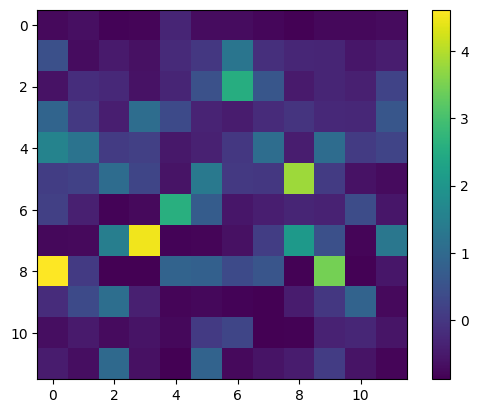

In [45]:
import torch
import matplotlib.pyplot as plt
mean_norms = original_BERTnorm.mean()
std_norms = original_BERTnorm.std()
original_BERTnorm = (original_BERTnorm - mean_norms) / std_norms

# 绘制热图
plt.imshow(original_BERTnorm.numpy(), interpolation='nearest')

# 添加颜色条，显示颜色代表的数值大小
plt.colorbar()

# 显示热图
plt.show()

In [50]:
AE_BERT = torch.load("D:\\research\\research4\BERT_AE - rectified - rectified\BERT_2329AE.pt")

C:\Users\m1830\AppData\Local\Temp\ipykernel_21784\3643627904.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  AE_BERT = torch.load("D:\\research\\research4\BERT_AE - rect

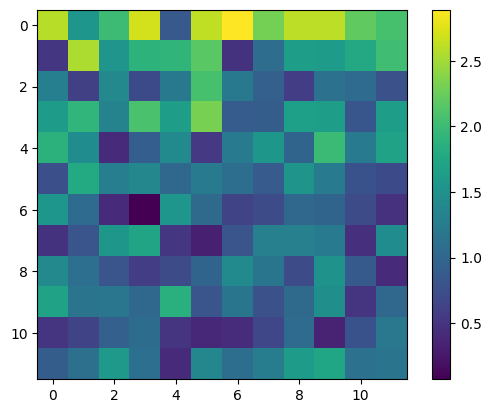

In [52]:
plt.imshow(AE_BERT.detach().numpy(), interpolation='nearest')

# 添加颜色条，显示颜色代表的数值大小
plt.colorbar()

# 显示热图
plt.show()

这里要对QKV的范数计算矩阵，做调整，因为剪过头以后，weight会少维度，这时没法通过分割来算出每个头的范数，所以靠现阶段已剪过的头来进行扩充。

In [77]:
import torch 
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from textpruner import TransformerPruner

# Load model directly
tokenizer = AutoTokenizer.from_pretrained("hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2")
model = AutoModelForSequenceClassification.from_pretrained("hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2",output_attentions=True)

# load the dataset 
ds = load_dataset("hw2942/financial-news-sentiment")


d:\Python\lib\site-packages\transformers\modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cpu")
d:\Pytho

In [78]:
import torch
from tqdm import tqdm
# 扩展一个剪枝后的 tensor 到 768x768
def expand_weights_to_768x768(tensor, pruned_heads):
    # 初始化列表，存储拼接的张量
    tensors_to_concat = []
    start = 0
    # 按照 pruned_heads 进行插入
    for head_idx, keep in enumerate(pruned_heads):
        if keep == 1:
            # 如果该头保留，保留原来的 64x768
            tensors_to_concat.append(tensor[start:start+64, :])
            start += 64  # 每次移动 64 行
        else:
            # 如果该头被剪掉，插入 64x768 的零矩阵
            tensors_to_concat.append(torch.zeros(64, tensor.size(1)).to(tensor.device)) 
    # 将所有部分拼接起来，得到最终的 768x768 张量
    expanded_tensor = torch.cat(tensors_to_concat, dim=0)
    return expanded_tensor
def get_QKV_norm(ds, model, tokenizer, pruned_heads, batch_size=32, device='cuda'):
    model.to(device)
    norms_Q = torch.zeros(12, 12).to(device)
    norms_K = torch.zeros(12, 12).to(device)
    norms_V = torch.zeros(12, 12).to(device)
    all_titles = ds['train']['Title']
    for layer in range(12):
        attention_layer = model.bert.encoder.layer[layer].attention.self
        heads_Q_weight = attention_layer.query.weight
        heads_K_weight = attention_layer.key.weight
        heads_V_weight = attention_layer.value.weight
        
        heads_Q_weight = heads_Q_weight.to(device)
        heads_K_weight = heads_K_weight.to(device)
        heads_V_weight = heads_V_weight.to(device)
        for i in range(0, len(all_titles), batch_size):
            batch_titles = all_titles[i:i+batch_size]
            inputs = tokenizer(batch_titles, return_tensors='pt', padding=True, truncation=True)
            inputs = {key: val.to(device) for key, val in inputs.items()}
            outputs = model(**inputs)
            sequence_output = outputs.logits
            loss = torch.norm(sequence_output)
            model.zero_grad()
            loss.backward()
            # 处理剪枝后的权重，扩展到 768x768
            GQ  = expand_weights_to_768x768(heads_Q_weight.grad, pruned_heads[layer])
            GK  = expand_weights_to_768x768(heads_K_weight.grad, pruned_heads[layer])
            GV  = expand_weights_to_768x768(heads_V_weight.grad, pruned_heads[layer])
            tensor_Q_reshaped = GQ.view(12, 64, 768)
            tensor_K_reshaped = GK.view(12, 64, 768)
            tensor_V_reshaped = GV.view(12, 64, 768)
            l2_Q_norms = torch.norm(tensor_Q_reshaped, p=2, dim=(1, 2))
            l2_K_norms = torch.norm(tensor_K_reshaped, p=2, dim=(1, 2))
            l2_V_norms = torch.norm(tensor_V_reshaped, p=2, dim=(1, 2))
            norms_Q[layer] += l2_Q_norms
            norms_K[layer] += l2_K_norms
            norms_V[layer] += l2_V_norms
        model.zero_grad()
    norms_Q = norms_Q.cpu() / len(all_titles)
    norms_K = norms_K.cpu() / len(all_titles)
    norms_V = norms_V.cpu() / len(all_titles)
    norms = norms_Q * norms_K * norms_V
    mean_norms = norms.mean()
    std_norms = norms.std()
    normalized = (norms - mean_norms) / std_norms
    return normalized

In [79]:
def get_new_head_mask_basedonG(head_mask_previous,Gnorm):
    selected_matrix = head_mask_previous * (Gnorm.max()-Gnorm)
    if (torch.all(torch.eq(selected_matrix, 0)).item()==True) and (torch.all(torch.eq(head_mask_previous, 0)).item()==False):
        layer = torch.nonzero(head_mask_previous)[0][0]
        head = torch.nonzero(head_mask_previous)[0][1]
        head_mask_previous[layer][head] = 0
        current_head_mask = head_mask_previous
        return current_head_mask
    layer=torch.argmax(selected_matrix) // selected_matrix.size(1)
    head=torch.argmax(selected_matrix) % selected_matrix.size(1)
    print('layer:',layer,'\nhead:',head)
    head_mask_previous[layer][head] = 0
    current_head_mask = head_mask_previous
    return current_head_mask
def get_acc(ds,model,tokenizer,device='cuda'):
    total = 0
    right = 0
    model.to(device)
    for data in ds['train']:
        inputs = tokenizer(data['Title'],return_tensors='pt').to(device)
        outputs = model(**inputs)
        total  += 1
        if torch.max(outputs[0][0].softmax(0),dim=0).indices==data['labels']:
            right += 1
    return right/total
def prune_based_on_G(ds,model,tokenizer):
    head_mask = torch.tensor([[1]*12]*12)
    accs=[]
    pruner = TransformerPruner(model)
    model.to('cuda')
    accs.append(get_acc(ds,model,tokenizer))
    print('pruned heads:',0,'acc:',accs[0])
    for i in tqdm(range(144)):
        Gnorm = get_QKV_norm(ds,model,tokenizer,pruned_heads=head_mask)
        head_mask = get_new_head_mask_basedonG(head_mask,Gnorm)
        model.to('cuda')
        pruner.prune(head_mask=head_mask,ffn_mask=torch.tensor([[1]*3072]*12),save_model=False)
        acc_score = get_acc(ds,model,tokenizer)
        accs.append(acc_score)
        print('pruned heads:',i+1,'acc:',acc_score)
    return accs

In [80]:
accs=prune_based_on_G(ds,model,tokenizer)

pruned heads: 0 acc: 0.9682267067410906


  0%|          | 0/144 [00:00<?, ?it/s]
























100%|██████████| 73/73 [00:02<00:00, 24.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.62it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.94it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.58it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.06it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.05it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.03it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.18s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  1%|          | 1/144 [00:52<2:05:08, 52.51s/it]

pruned heads: 1 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 22.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.11it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]




























100%|██████████| 12/12 [00:41<00:00,  3.43s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  1%|▏         | 2/144 [01:49<2:10:05, 54.97s/it]

pruned heads: 2 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 21.37it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.17it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.08it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.13it/s]





























100%|██████████| 12/12 [00:41<00:00,  3.49s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  2%|▏         | 3/144 [02:46<2:11:13, 55.84s/it]

pruned heads: 3 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 22.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.05it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.97it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.06it/s]




























100%|██████████| 12/12 [00:41<00:00,  3.50s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  3%|▎         | 4/144 [03:44<2:12:36, 56.83s/it]

pruned heads: 4 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 21.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.96it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.90it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.97it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.86it/s]






























100%|██████████| 12/12 [00:42<00:00,  3.53s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  3%|▎         | 5/144 [04:42<2:12:29, 57.19s/it]

pruned heads: 5 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 21.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.17it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.87it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.89it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.75it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.94it/s]




























100%|██████████| 12/12 [00:42<00:00,  3.53s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  4%|▍         | 6/144 [05:40<2:12:10, 57.46s/it]

pruned heads: 6 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 21.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.96it/s]






























100%|██████████| 73/73 [00:03<00:00, 19.78it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.88it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.90it/s]






























100%|██████████| 12/12 [00:42<00:00,  3.53s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  5%|▍         | 7/144 [06:38<2:11:48, 57.73s/it]

pruned heads: 7 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 22.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.30it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.84it/s]






























100%|██████████| 73/73 [00:03<00:00, 19.67it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.79it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.65it/s]





























100%|██████████| 12/12 [00:42<00:00,  3.52s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  6%|▌         | 8/144 [07:36<2:11:14, 57.90s/it]

pruned heads: 8 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 20.58it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.92it/s]






























100%|██████████| 73/73 [00:03<00:00, 19.79it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.01it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.96it/s]




























100%|██████████| 12/12 [00:42<00:00,  3.53s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  6%|▋         | 9/144 [08:34<2:10:20, 57.93s/it]

pruned heads: 9 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.00it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.92it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.83it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.25it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.73it/s]



























100%|██████████| 12/12 [00:42<00:00,  3.52s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  7%|▋         | 10/144 [09:32<2:09:17, 57.89s/it]

pruned heads: 10 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 20.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.45it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.42it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.97it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.94it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.89it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.89it/s]





























100%|██████████| 12/12 [00:42<00:00,  3.52s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  8%|▊         | 11/144 [10:30<2:08:31, 57.98s/it]

pruned heads: 11 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.61it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.51it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.34it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.18it/s]






























100%|██████████| 73/73 [00:03<00:00, 19.75it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.97it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.77it/s]





























100%|██████████| 12/12 [00:42<00:00,  3.53s/it]


head_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  8%|▊         | 12/144 [11:29<2:07:52, 58.12s/it]

pruned heads: 12 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 20.74it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.25it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.16it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.19it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.87it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.07it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.82it/s]




























100%|██████████| 12/12 [00:42<00:00,  3.54s/it]


head_mask tensor([[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


  9%|▉         | 13/144 [12:27<2:07:14, 58.28s/it]

pruned heads: 13 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.60it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.41it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.03it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.28it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.07it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.02it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.95it/s]





























100%|██████████| 12/12 [00:42<00:00,  3.53s/it]


head_mask tensor([[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


 10%|▉         | 14/144 [13:26<2:06:42, 58.48s/it]

pruned heads: 14 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 20.84it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.54it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.53it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.30it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.23it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.86it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.05it/s]





























100%|██████████| 12/12 [00:42<00:00,  3.51s/it]


head_mask tensor([[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


 10%|█         | 15/144 [14:24<2:05:25, 58.34s/it]

pruned heads: 15 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 21.37it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.78it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.51it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.18it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.30it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.08it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.17it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.18it/s]




























100%|██████████| 12/12 [00:42<00:00,  3.51s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


 11%|█         | 16/144 [15:24<2:05:02, 58.61s/it]

pruned heads: 16 acc: 0.9686560755689136




























100%|██████████| 73/73 [00:03<00:00, 20.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.97it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.64it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.34it/s]
































100%|██████████| 73/73 [00:03<00:00, 19.53it/s]




























100%|██████████| 73/73 [00:03<00:00, 20.06it/s]




























100%|██████████| 73/73 [00:03<00:00, 19.80it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.77it/s]





























100%|██████████| 73/73 [00:03<00:00, 19.90it/s]



























100%|██████████| 12/12 [00:43<00:00,  3.61s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


 12%|█▏        | 17/144 [16:23<2:04:35, 58.87s/it]

pruned heads: 17 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 21.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.78it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.44it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.19it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.14it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.28it/s]



























100%|██████████| 73/73 [00:03<00:00, 20.16it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.18it/s]


























100%|██████████| 12/12 [00:41<00:00,  3.50s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])


 12%|█▎        | 18/144 [17:21<2:03:03, 58.60s/it]

pruned heads: 18 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 20.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.76it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.63it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.51it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.32it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.37it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.40it/s]


























100%|██████████| 12/12 [00:41<00:00,  3.48s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 13%|█▎        | 19/144 [18:19<2:01:35, 58.37s/it]

pruned heads: 19 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 21.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.05it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.78it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.58it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.53it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.50it/s]


























100%|██████████| 12/12 [00:41<00:00,  3.45s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 14%|█▍        | 20/144 [19:16<2:00:10, 58.15s/it]

pruned heads: 20 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 21.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.97it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.84it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.76it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.77it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.70it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.48it/s]


























100%|██████████| 12/12 [00:41<00:00,  3.43s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 15%|█▍        | 21/144 [20:14<1:58:34, 57.84s/it]

pruned heads: 21 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.30it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.06it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.80it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.84it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.60it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.65it/s]

























100%|██████████| 12/12 [00:41<00:00,  3.42s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 15%|█▌        | 22/144 [21:11<1:57:14, 57.66s/it]

pruned heads: 22 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.46it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.30it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.86it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.54it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.69it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.69it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.41s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 16%|█▌        | 23/144 [22:08<1:56:04, 57.56s/it]

pruned heads: 23 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.81it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.74it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.68it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.75it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.41s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 17%|█▋        | 24/144 [23:05<1:54:54, 57.45s/it]

pruned heads: 24 acc: 0.9695148132245599



























100%|██████████| 73/73 [00:03<00:00, 21.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.41it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.00it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.92it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.68it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.41s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 17%|█▋        | 25/144 [24:02<1:53:44, 57.35s/it]

pruned heads: 25 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 21.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.45it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.91it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.98it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.71it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.39s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 18%|█▊        | 26/144 [24:59<1:52:23, 57.15s/it]

pruned heads: 26 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 21.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.62it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.51it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.11it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.98it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.97it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.38s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 19%|█▉        | 27/144 [25:56<1:51:19, 57.09s/it]

pruned heads: 27 acc: 0.9690854443967368



























100%|██████████| 73/73 [00:03<00:00, 22.06it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.74it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.46it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]


























100%|██████████| 73/73 [00:03<00:00, 20.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 20.98it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.37s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 19%|█▉        | 28/144 [26:53<1:50:00, 56.90s/it]

pruned heads: 28 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.69it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.58it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.06it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.38s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]])


 20%|██        | 29/144 [27:50<1:49:19, 57.04s/it]

pruned heads: 29 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.66it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.57it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.02it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.38s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 21%|██        | 30/144 [28:47<1:48:24, 57.06s/it]

pruned heads: 30 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.76it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.35it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.23it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.21it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.36s/it]


head_mask tensor([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 22%|██▏       | 31/144 [29:44<1:47:17, 56.97s/it]

pruned heads: 31 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 22.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.76it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.70it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.35it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.02it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.35s/it]


head_mask tensor([[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 22%|██▏       | 32/144 [30:40<1:45:54, 56.74s/it]

pruned heads: 32 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 21.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.92it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.23it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.18it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.36s/it]


head_mask tensor([[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 23%|██▎       | 33/144 [31:36<1:44:41, 56.59s/it]

pruned heads: 33 acc: 0.9677973379132675



























100%|██████████| 73/73 [00:03<00:00, 22.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.87it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.84it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.50it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.19it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.34s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 24%|██▎       | 34/144 [32:32<1:43:31, 56.47s/it]

pruned heads: 34 acc: 0.9673679690854444



























100%|██████████| 73/73 [00:03<00:00, 21.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.98it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.92it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.51it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.46it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.26it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.34s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 24%|██▍       | 35/144 [33:28<1:42:23, 56.36s/it]

pruned heads: 35 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 22.23it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.38it/s]

























100%|██████████| 12/12 [00:40<00:00,  3.34s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 25%|██▌       | 36/144 [34:24<1:41:12, 56.23s/it]

pruned heads: 36 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 21.72it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.23it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.17it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.06it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.60it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.53it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.50it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.56it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.31s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 26%|██▌       | 37/144 [35:20<1:40:02, 56.09s/it]

pruned heads: 37 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 22.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.29it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.11it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.72it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.57it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.40it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.30s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 26%|██▋       | 38/144 [36:16<1:38:49, 55.94s/it]

pruned heads: 38 acc: 0.9686560755689136




























100%|██████████| 73/73 [00:03<00:00, 21.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.17it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.66it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.70it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.42it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.30s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 27%|██▋       | 39/144 [37:11<1:37:45, 55.86s/it]

pruned heads: 39 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 22.57it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.76it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.53it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.56it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.31s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 28%|██▊       | 40/144 [38:07<1:36:50, 55.87s/it]

pruned heads: 40 acc: 0.9677973379132675



























100%|██████████| 73/73 [00:03<00:00, 21.98it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.53it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.54it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.31s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 28%|██▊       | 41/144 [39:03<1:35:48, 55.81s/it]

pruned heads: 41 acc: 0.9673679690854444



























100%|██████████| 73/73 [00:03<00:00, 22.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.42it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.77it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.78it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.69it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.66it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.30s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]])


 29%|██▉       | 42/144 [39:59<1:35:11, 55.99s/it]

pruned heads: 42 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 21.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.41it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.30it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.80it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.58it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.30s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 30%|██▉       | 43/144 [40:55<1:33:55, 55.80s/it]

pruned heads: 43 acc: 0.9665092314297982



























100%|██████████| 73/73 [00:03<00:00, 22.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.46it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.17it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.80it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.73it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.27s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 31%|███       | 44/144 [41:50<1:32:48, 55.68s/it]

pruned heads: 44 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 22.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.37it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.11it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.91it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.87it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.87it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.70it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.29s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 31%|███▏      | 45/144 [42:46<1:31:43, 55.59s/it]

pruned heads: 45 acc: 0.9686560755689136



























100%|██████████| 73/73 [00:03<00:00, 22.57it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.61it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.76it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.78it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.28s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 32%|███▏      | 46/144 [43:41<1:30:54, 55.66s/it]

pruned heads: 46 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 22.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.69it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.29it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.98it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.91it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.29s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 33%|███▎      | 47/144 [44:37<1:29:46, 55.53s/it]

pruned heads: 47 acc: 0.9665092314297982



























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.80it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.46it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.53it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.03it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.27s/it]


head_mask tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 33%|███▎      | 48/144 [45:32<1:28:49, 55.51s/it]

pruned heads: 48 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 22.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.51it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.00it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.98it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.30s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])


 34%|███▍      | 49/144 [46:28<1:27:51, 55.49s/it]

pruned heads: 49 acc: 0.9665092314297982



























100%|██████████| 73/73 [00:03<00:00, 22.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.80it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.11it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.03it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.28s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]])


 35%|███▍      | 50/144 [47:23<1:26:51, 55.44s/it]

pruned heads: 50 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 22.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.61it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.53it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.24it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.27s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]])


 35%|███▌      | 51/144 [48:18<1:25:54, 55.42s/it]

pruned heads: 51 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 23.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.70it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.29it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 21.93it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.26s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 36%|███▌      | 52/144 [49:13<1:24:52, 55.35s/it]

pruned heads: 52 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 22.42it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.60it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.57it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.45it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.29it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.04it/s]

























100%|██████████| 12/12 [00:39<00:00,  3.26s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 37%|███▋      | 53/144 [50:09<1:23:50, 55.28s/it]

pruned heads: 53 acc: 0.9660798626019751



























100%|██████████| 73/73 [00:03<00:00, 23.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.62it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.61it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.31it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.23s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 38%|███▊      | 54/144 [51:03<1:22:41, 55.13s/it]

pruned heads: 54 acc: 0.9665092314297982



























100%|██████████| 73/73 [00:03<00:00, 22.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.99it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.62it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.11it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.24s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 38%|███▊      | 55/144 [52:00<1:22:24, 55.55s/it]

pruned heads: 55 acc: 0.9660798626019751




























100%|██████████| 73/73 [00:03<00:00, 23.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.62it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.45it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.58it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.32it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.23s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 39%|███▉      | 56/144 [52:55<1:21:21, 55.47s/it]

pruned heads: 56 acc: 0.9673679690854444



























100%|██████████| 73/73 [00:03<00:00, 22.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.54it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.49it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.22s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 40%|███▉      | 57/144 [53:50<1:20:07, 55.26s/it]

pruned heads: 57 acc: 0.9673679690854444



























100%|██████████| 73/73 [00:03<00:00, 23.51it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.05it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.77it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.70it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.60it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.20s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 40%|████      | 58/144 [54:44<1:18:47, 54.97s/it]

pruned heads: 58 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 22.87it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.34it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.11it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.94it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.97it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.74it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.78it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.57it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.20s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 41%|████      | 59/144 [55:39<1:17:43, 54.86s/it]

pruned heads: 59 acc: 0.9669386002576214



























100%|██████████| 73/73 [00:03<00:00, 23.66it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.66it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.35it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.97it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.87it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.74it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.17s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 42%|████▏     | 60/144 [56:33<1:16:22, 54.56s/it]

pruned heads: 60 acc: 0.9677973379132675



























100%|██████████| 73/73 [00:03<00:00, 23.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.80it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.17s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 42%|████▏     | 61/144 [57:26<1:15:08, 54.32s/it]

pruned heads: 61 acc: 0.9677973379132675



























100%|██████████| 73/73 [00:03<00:00, 23.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.50it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.35it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.15it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.05it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.99it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.79it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.75it/s]

























100%|██████████| 12/12 [00:38<00:00,  3.17s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 43%|████▎     | 62/144 [58:20<1:14:05, 54.21s/it]

pruned heads: 62 acc: 0.9673679690854444



























100%|██████████| 73/73 [00:03<00:00, 23.17it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.35it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.14it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.92it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.00it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.77it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.17s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 44%|████▍     | 63/144 [59:14<1:13:02, 54.11s/it]

pruned heads: 63 acc: 0.9682267067410906



























100%|██████████| 73/73 [00:03<00:00, 24.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.82it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.16s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 44%|████▍     | 64/144 [1:00:08<1:12:09, 54.11s/it]

pruned heads: 64 acc: 0.9665092314297982



























100%|██████████| 73/73 [00:03<00:00, 23.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.64it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.42it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.84it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.15s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 45%|████▌     | 65/144 [1:01:02<1:11:07, 54.02s/it]

pruned heads: 65 acc: 0.9639330184628596



























100%|██████████| 73/73 [00:03<00:00, 24.00it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.37it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.35it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.05it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.08it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.97it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.14s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 46%|████▌     | 66/144 [1:01:57<1:10:20, 54.11s/it]

pruned heads: 66 acc: 0.9647917561185058



























100%|██████████| 73/73 [00:03<00:00, 23.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.90it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.54it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.90it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.12s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 47%|████▋     | 67/144 [1:02:50<1:09:08, 53.88s/it]

pruned heads: 67 acc: 0.9647917561185058



























100%|██████████| 73/73 [00:03<00:00, 24.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.01it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.38it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.24it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.11s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 47%|████▋     | 68/144 [1:03:43<1:08:03, 53.73s/it]

pruned heads: 68 acc: 0.9635036496350365



























100%|██████████| 73/73 [00:03<00:00, 23.54it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.92it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.58it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.54it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 22.94it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.12s/it]


head_mask tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 48%|████▊     | 69/144 [1:04:37<1:07:03, 53.65s/it]

pruned heads: 69 acc: 0.9635036496350365



























100%|██████████| 73/73 [00:02<00:00, 24.41it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.85it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.63it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.68it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.41it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.42it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.26it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.10s/it]
d:\Python\lib\site-packages\torch\nn\init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn(

head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 49%|████▊     | 70/144 [1:05:30<1:06:05, 53.58s/it]

pruned heads: 70 acc: 0.9604980678402748




























100%|██████████| 73/73 [00:03<00:00, 23.52it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.12it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.60it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.65it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.48it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.49it/s]

























100%|██████████| 12/12 [00:37<00:00,  3.08s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 49%|████▉     | 71/144 [1:06:23<1:04:55, 53.36s/it]

pruned heads: 71 acc: 0.9583512237011593



























100%|██████████| 73/73 [00:02<00:00, 24.61it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.91it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.83it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.71it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.54it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.07s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 50%|█████     | 72/144 [1:07:16<1:03:45, 53.13s/it]

pruned heads: 72 acc: 0.95706311721769



























100%|██████████| 73/73 [00:03<00:00, 23.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.95it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.90it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.59it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.67it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.73it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.52it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.07s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 51%|█████     | 73/144 [1:08:09<1:02:49, 53.09s/it]

pruned heads: 73 acc: 0.9579218548733361



























100%|██████████| 73/73 [00:02<00:00, 24.60it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.42it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.00it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.98it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.04it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.80it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.82it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.75it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.77it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.05s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 51%|█████▏    | 74/144 [1:09:01<1:01:36, 52.81s/it]

pruned heads: 74 acc: 0.9583512237011593



























100%|██████████| 73/73 [00:03<00:00, 24.01it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.49it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.19it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.09it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.21it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.89it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.86it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.63it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.05s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 52%|█████▏    | 75/144 [1:09:54<1:01:00, 53.05s/it]

pruned heads: 75 acc: 0.9579218548733361



























100%|██████████| 73/73 [00:02<00:00, 24.74it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.49it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.36it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.92it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.20it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.91it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.94it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.99it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.81it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.75it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.04s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 53%|█████▎    | 76/144 [1:10:47<59:52, 52.83s/it]  

pruned heads: 76 acc: 0.9574924860455131



























100%|██████████| 73/73 [00:03<00:00, 23.89it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.43it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.44it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.99it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.94it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.02it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.91it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.83it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.04s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 53%|█████▎    | 77/144 [1:11:39<58:50, 52.70s/it]

pruned heads: 77 acc: 0.9566337483898669



























100%|██████████| 73/73 [00:02<00:00, 24.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.72it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.37it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.23it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.88it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.07it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.13it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.93it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.76it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.02s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 54%|█████▍    | 78/144 [1:12:31<57:46, 52.52s/it]

pruned heads: 78 acc: 0.9549162730785745



























100%|██████████| 73/73 [00:02<00:00, 24.34it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.80it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.55it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.03it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.96it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.99it/s]

























100%|██████████| 73/73 [00:03<00:00, 23.89it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.02s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 55%|█████▍    | 79/144 [1:13:23<56:43, 52.36s/it]

pruned heads: 79 acc: 0.9536281665951052



























100%|██████████| 73/73 [00:02<00:00, 25.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.38it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.36it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.38it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.40it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.29it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.16it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.06it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.00s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 56%|█████▌    | 80/144 [1:14:15<55:36, 52.13s/it]

pruned heads: 80 acc: 0.9536281665951052



























100%|██████████| 73/73 [00:02<00:00, 24.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.94it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.54it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.45it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.39it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.10it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.32it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.06it/s]

























100%|██████████| 12/12 [00:36<00:00,  3.00s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 56%|█████▋    | 81/144 [1:15:06<54:37, 52.02s/it]

pruned heads: 81 acc: 0.952769428939459



























100%|██████████| 73/73 [00:02<00:00, 25.37it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.47it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.56it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.24it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.28it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.29it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.22it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.03it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.99s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 57%|█████▋    | 82/144 [1:15:59<53:49, 52.09s/it]

pruned heads: 82 acc: 0.9544869042507514



























100%|██████████| 73/73 [00:03<00:00, 24.29it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.07it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.63it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.56it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.43it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.25it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.33it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.26it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.18it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.12it/s]

























100%|██████████| 12/12 [00:35<00:00,  3.00s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 58%|█████▊    | 83/144 [1:16:51<52:52, 52.00s/it]

pruned heads: 83 acc: 0.9549162730785745



























100%|██████████| 73/73 [00:02<00:00, 25.29it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.15it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.59it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.62it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.45it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.36it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.46it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.27it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.00it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.98s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 58%|█████▊    | 84/144 [1:17:42<51:59, 51.99s/it]

pruned heads: 84 acc: 0.9544869042507514



























100%|██████████| 73/73 [00:03<00:00, 24.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.09it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.00it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.87it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.66it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.68it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.40it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.52it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.47it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.31it/s]

























100%|██████████| 73/73 [00:03<00:00, 24.33it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.98s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 59%|█████▉    | 85/144 [1:18:34<50:58, 51.84s/it]

pruned heads: 85 acc: 0.9523400601116359



























100%|██████████| 73/73 [00:02<00:00, 25.30it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.07it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.57it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.73it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.69it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.53it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.53it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.43it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.37it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.37it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.97s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 60%|█████▉    | 86/144 [1:19:25<49:59, 51.71s/it]

pruned heads: 86 acc: 0.9531987977672821



























100%|██████████| 73/73 [00:02<00:00, 24.74it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.17it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.01it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.80it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.84it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.68it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.48it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.36it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.44it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.97s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 60%|██████    | 87/144 [1:20:17<49:00, 51.59s/it]

pruned heads: 87 acc: 0.9536281665951052



























100%|██████████| 73/73 [00:02<00:00, 25.44it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.15it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.79it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.61it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.65it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.61it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.44it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.48it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.95s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 61%|██████    | 88/144 [1:21:08<48:01, 51.45s/it]

pruned heads: 88 acc: 0.9536281665951052



























100%|██████████| 73/73 [00:02<00:00, 24.79it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.39it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.93it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.85it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.74it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.62it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.70it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.43it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.37it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.42it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.96s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 62%|██████▏   | 89/144 [1:22:00<47:29, 51.81s/it]

pruned heads: 89 acc: 0.952769428939459



























100%|██████████| 73/73 [00:02<00:00, 25.72it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.28it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.35it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.89it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.84it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.75it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.87it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.82it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.70it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.65it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.94s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 62%|██████▎   | 90/144 [1:22:52<46:27, 51.63s/it]

pruned heads: 90 acc: 0.9514813224559897



























100%|██████████| 73/73 [00:02<00:00, 24.88it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.33it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.72it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.14it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.93it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.91it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.86it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.66it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.69it/s]

























100%|██████████| 12/12 [00:35<00:00,  2.94s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 63%|██████▎   | 91/144 [1:23:43<45:32, 51.56s/it]

pruned heads: 91 acc: 0.9497638471446973



























100%|██████████| 73/73 [00:02<00:00, 25.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.08it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.07it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.97it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.05it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.98it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.70it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.81it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.92s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 64%|██████▍   | 92/144 [1:24:34<44:29, 51.34s/it]

pruned heads: 92 acc: 0.9493344783168742



























100%|██████████| 73/73 [00:02<00:00, 25.15it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.52it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.30it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.08it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.97it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.95it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.89it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.83it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.92s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])


 65%|██████▍   | 93/144 [1:25:25<43:30, 51.19s/it]

pruned heads: 93 acc: 0.948475740661228



























100%|██████████| 73/73 [00:02<00:00, 25.91it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.63it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.47it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.41it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.09it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.02it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.14it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.93it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.95it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.90s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 65%|██████▌   | 94/144 [1:26:15<42:28, 50.96s/it]

pruned heads: 94 acc: 0.9467582653499356



























100%|██████████| 73/73 [00:02<00:00, 25.17it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.68it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.55it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.21it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.29it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.16it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.21it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.15it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.03it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.89s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 66%|██████▌   | 95/144 [1:27:06<41:34, 50.90s/it]

pruned heads: 95 acc: 0.9437526835551739



























100%|██████████| 73/73 [00:02<00:00, 26.05it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.68it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.53it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.53it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.51it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.36it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.12it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.26it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.22it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.02it/s]

























100%|██████████| 73/73 [00:02<00:00, 24.91it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.89s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 67%|██████▋   | 96/144 [1:27:56<40:37, 50.77s/it]

pruned heads: 96 acc: 0.9454701588664663



























100%|██████████| 73/73 [00:02<00:00, 25.30it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.69it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.89it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.60it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.54it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.36it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.16it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.24it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.14it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.17it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.88s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 67%|██████▋   | 97/144 [1:28:47<39:50, 50.86s/it]

pruned heads: 97 acc: 0.9416058394160584



























100%|██████████| 73/73 [00:02<00:00, 26.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.88it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.85it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.62it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.66it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.52it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.37it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.24it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.15it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.11it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.87s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 68%|██████▊   | 98/144 [1:29:38<38:52, 50.72s/it]

pruned heads: 98 acc: 0.9390296264491198



























100%|██████████| 73/73 [00:02<00:00, 25.43it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.91it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.77it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.68it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.47it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.30it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.29it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.34it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.87s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 69%|██████▉   | 99/144 [1:30:28<37:56, 50.59s/it]

pruned heads: 99 acc: 0.9394589952769429



























100%|██████████| 73/73 [00:02<00:00, 26.54it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.15it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.05it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.65it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.69it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.34it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.63it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.38it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.44it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.85s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])


 69%|██████▉   | 100/144 [1:31:18<36:59, 50.44s/it]

pruned heads: 100 acc: 0.9330184628595964



























100%|██████████| 73/73 [00:02<00:00, 25.62it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.08it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.16it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.84it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.64it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.40it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.38it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.85s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 70%|███████   | 101/144 [1:32:08<36:00, 50.24s/it]

pruned heads: 101 acc: 0.9325890940317733


























100%|██████████| 73/73 [00:02<00:00, 26.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.22it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.14it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.78it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.84it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.60it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.53it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.83s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 71%|███████   | 102/144 [1:32:58<35:02, 50.06s/it]

pruned heads: 102 acc: 0.9343065693430657



























100%|██████████| 73/73 [00:02<00:00, 25.93it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.11it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.06it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.93it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.79it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.43it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.82it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.53it/s]

























100%|██████████| 12/12 [00:34<00:00,  2.84s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 72%|███████▏  | 103/144 [1:33:47<34:06, 49.91s/it]

pruned heads: 103 acc: 0.9278660369257192



























100%|██████████| 73/73 [00:02<00:00, 26.60it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.31it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.18it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.96it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.54it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.85it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.55it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.51it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.57it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.83s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 72%|███████▏  | 104/144 [1:34:37<33:18, 49.96s/it]

pruned heads: 104 acc: 0.9235723486474882



























100%|██████████| 73/73 [00:02<00:00, 25.86it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.38it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.28it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.10it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.10it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.85it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.73it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.69it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.57it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.83s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 73%|███████▎  | 105/144 [1:35:27<32:26, 49.92s/it]

pruned heads: 105 acc: 0.9257191927866036



























100%|██████████| 73/73 [00:02<00:00, 26.74it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.56it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.34it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.24it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.02it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.04it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.97it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.81it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.80s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 74%|███████▎  | 106/144 [1:36:16<31:30, 49.74s/it]

pruned heads: 106 acc: 0.9261485616144268



























100%|██████████| 73/73 [00:02<00:00, 26.38it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.53it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.22it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.35it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.29it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.99it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.96it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.89it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.80s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 74%|███████▍  | 107/144 [1:37:06<30:34, 49.59s/it]

pruned heads: 107 acc: 0.9261485616144268



























100%|██████████| 73/73 [00:02<00:00, 26.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.40it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.30it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.06it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.95it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.12it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.77it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.85it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.80s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 75%|███████▌  | 108/144 [1:37:55<29:44, 49.57s/it]

pruned heads: 108 acc: 0.9244310863031344



























100%|██████████| 73/73 [00:02<00:00, 26.36it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.73it/s]
























100%|██████████| 73/73 [00:02<00:00, 26.91it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.54it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.33it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.04it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.06it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.08it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.99it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.78s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 76%|███████▌  | 109/144 [1:38:44<28:48, 49.39s/it]

pruned heads: 109 acc: 0.9248604551309575


























100%|██████████| 73/73 [00:02<00:00, 27.48it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.07it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.74it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.57it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.61it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.28it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.26it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.33it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.21it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.19it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.10it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.76s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 76%|███████▋  | 110/144 [1:39:33<27:50, 49.14s/it]

pruned heads: 110 acc: 0.918419922713611



























100%|██████████| 73/73 [00:02<00:00, 26.55it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.88it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.35it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.13it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.09it/s]

























100%|██████████| 73/73 [00:02<00:00, 25.97it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.08it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.79s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 77%|███████▋  | 111/144 [1:40:22<26:58, 49.04s/it]

pruned heads: 111 acc: 0.9179905538857879



























100%|██████████| 73/73 [00:02<00:00, 27.41it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.95it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.03it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.34it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.51it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.44it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.25it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.45it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.25it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.19it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.76s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 78%|███████▊  | 112/144 [1:41:10<26:05, 48.91s/it]

pruned heads: 112 acc: 0.9115500214684414



























100%|██████████| 73/73 [00:02<00:00, 26.80it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.14it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.57it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.81it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.48it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.41it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.24it/s]

























100%|██████████| 12/12 [00:33<00:00,  2.75s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 78%|███████▊  | 113/144 [1:41:59<25:16, 48.92s/it]

pruned heads: 113 acc: 0.9081150708458566


























100%|██████████| 73/73 [00:02<00:00, 27.83it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.37it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.25it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.87it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.90it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.66it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.75it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.57it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.43it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.73s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 79%|███████▉  | 114/144 [1:42:47<24:21, 48.71s/it]

pruned heads: 114 acc: 0.9072563331902104



























100%|██████████| 73/73 [00:02<00:00, 26.81it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.26it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.32it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.68it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.41it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.55it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.55it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.45it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.74s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 80%|███████▉  | 115/144 [1:43:36<23:34, 48.77s/it]

pruned heads: 115 acc: 0.9051094890510949


























100%|██████████| 73/73 [00:02<00:00, 27.86it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.27it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.34it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.06it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.10it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.64it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.61it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.69it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.75it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.57it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.65it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.72s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 81%|████████  | 116/144 [1:44:24<22:38, 48.53s/it]

pruned heads: 116 acc: 0.9085444396736797



























100%|██████████| 73/73 [00:02<00:00, 26.90it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.46it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.49it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.31it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.08it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.99it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.91it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.86it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.80it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.76it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.71s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 81%|████████▏ | 117/144 [1:45:12<21:47, 48.44s/it]

pruned heads: 117 acc: 0.9008158007728639


























100%|██████████| 73/73 [00:02<00:00, 28.15it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.04it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.42it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.09it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.17it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.84it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.86it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.82it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.67it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.58it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.70s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 82%|████████▏ | 118/144 [1:46:01<21:01, 48.50s/it]

pruned heads: 118 acc: 0.896951481322456


























100%|██████████| 73/73 [00:02<00:00, 27.13it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.68it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.48it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.22it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.36it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.11it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.72it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.94it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.76it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.83it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.75it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.70s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 83%|████████▎ | 119/144 [1:46:50<20:17, 48.70s/it]

pruned heads: 119 acc: 0.8866466294547016


























100%|██████████| 73/73 [00:02<00:00, 28.23it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.23it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.59it/s]























100%|██████████| 73/73 [00:02<00:00, 27.67it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.27it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.02it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.96it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.92it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.10it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.11it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.98it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.68s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 83%|████████▎ | 120/144 [1:47:38<19:23, 48.48s/it]

pruned heads: 120 acc: 0.8853585229712323


























100%|██████████| 73/73 [00:02<00:00, 27.23it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.89it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.46it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.37it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.19it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.05it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.91it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.85it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.96it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.12it/s]

























100%|██████████| 73/73 [00:02<00:00, 26.93it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.69s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])


 84%|████████▍ | 121/144 [1:48:26<18:30, 48.28s/it]

pruned heads: 121 acc: 0.8802060970373551


























100%|██████████| 73/73 [00:02<00:00, 28.35it/s]























100%|██████████| 73/73 [00:02<00:00, 28.37it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.77it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.35it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.35it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.33it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.00it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.19it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.24it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.22it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.04it/s]

























100%|██████████| 12/12 [00:32<00:00,  2.67s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 85%|████████▍ | 122/144 [1:49:13<17:36, 48.01s/it]

pruned heads: 122 acc: 0.8810648346930013


























100%|██████████| 73/73 [00:02<00:00, 27.88it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.30it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.17it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.70it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.74it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.73it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.35it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.57it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.47it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.42it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.23it/s]

























100%|██████████| 12/12 [00:31<00:00,  2.65s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 85%|████████▌ | 123/144 [1:50:00<16:41, 47.67s/it]

pruned heads: 123 acc: 0.8643194504079004


























100%|██████████| 73/73 [00:02<00:00, 28.65it/s]























100%|██████████| 73/73 [00:02<00:00, 28.74it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.28it/s]























100%|██████████| 73/73 [00:02<00:00, 27.96it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.02it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.78it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.50it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.48it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.58it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.38it/s]
























100%|██████████| 12/12 [00:31<00:00,  2.62s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 86%|████████▌ | 124/144 [1:50:47<15:46, 47.34s/it]

pruned heads: 124 acc: 0.8557320738514383


























100%|██████████| 73/73 [00:02<00:00, 27.78it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.37it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.39it/s]

























100%|██████████| 73/73 [00:02<00:00, 28.00it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.82it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.81it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.70it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.73it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.67it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.63it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.69it/s]
























100%|██████████| 12/12 [00:31<00:00,  2.63s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 87%|████████▋ | 125/144 [1:51:33<14:54, 47.09s/it]

pruned heads: 125 acc: 0.8570201803349077
























100%|██████████| 73/73 [00:02<00:00, 28.91it/s]























100%|██████████| 73/73 [00:02<00:00, 28.41it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.44it/s]























100%|██████████| 73/73 [00:02<00:00, 28.17it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.58it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.71it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.54it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.70it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.49it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.50it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.51it/s]

























100%|██████████| 12/12 [00:31<00:00,  2.63s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 88%|████████▊ | 126/144 [1:52:20<14:05, 46.95s/it]

pruned heads: 126 acc: 0.8510090167453843


























100%|██████████| 73/73 [00:02<00:00, 27.99it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.64it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.33it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.28it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.95it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.72it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.92it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.64it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.95it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.47it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.70it/s]
























100%|██████████| 12/12 [00:31<00:00,  2.62s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 88%|████████▊ | 127/144 [1:53:07<13:20, 47.06s/it]

pruned heads: 127 acc: 0.8308286818376985























100%|██████████| 73/73 [00:02<00:00, 29.30it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.18it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.56it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.28it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.36it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.93it/s]

























100%|██████████| 73/73 [00:02<00:00, 27.84it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.81it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.80it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.94it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.01it/s]
























100%|██████████| 12/12 [00:31<00:00,  2.59s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 89%|████████▉ | 128/144 [1:53:54<12:30, 46.93s/it]

pruned heads: 128 acc: 0.8175182481751825


























100%|██████████| 73/73 [00:02<00:00, 28.31it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.80it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.74it/s]























100%|██████████| 73/73 [00:02<00:00, 28.60it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.48it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.15it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.19it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.26it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.14it/s]
























100%|██████████| 73/73 [00:02<00:00, 27.99it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.10it/s]
























100%|██████████| 12/12 [00:31<00:00,  2.58s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 90%|████████▉ | 129/144 [1:54:40<11:39, 46.62s/it]

pruned heads: 129 acc: 0.7943323314727351























100%|██████████| 73/73 [00:02<00:00, 29.97it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.79it/s]























100%|██████████| 73/73 [00:02<00:00, 28.90it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.57it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.48it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.52it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.31it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.49it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.41it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.28it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.29it/s]
























100%|██████████| 12/12 [00:30<00:00,  2.55s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 90%|█████████ | 130/144 [1:55:25<10:48, 46.31s/it]

pruned heads: 130 acc: 0.7964791756118506

























100%|██████████| 73/73 [00:02<00:00, 28.96it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.15it/s]























100%|██████████| 73/73 [00:02<00:00, 29.21it/s]























100%|██████████| 73/73 [00:02<00:00, 28.76it/s]























100%|██████████| 73/73 [00:02<00:00, 28.76it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.68it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.63it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.49it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.44it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.32it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.30it/s]
























100%|██████████| 12/12 [00:30<00:00,  2.55s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 91%|█████████ | 131/144 [1:56:11<09:59, 46.09s/it]

pruned heads: 131 acc: 0.7823100042936882






















100%|██████████| 73/73 [00:02<00:00, 30.00it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.48it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.32it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.18it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.70it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.66it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.83it/s]























100%|██████████| 73/73 [00:02<00:00, 28.80it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.54it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.53it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.40it/s]
























100%|██████████| 12/12 [00:30<00:00,  2.53s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 92%|█████████▏| 132/144 [1:56:56<09:09, 45.75s/it]

pruned heads: 132 acc: 0.7346500644053242
























100%|██████████| 73/73 [00:02<00:00, 29.24it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.65it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.65it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.28it/s]























100%|██████████| 73/73 [00:02<00:00, 29.08it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.95it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.91it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.80it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.94it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.76it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.65it/s]
























100%|██████████| 12/12 [00:30<00:00,  2.52s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 92%|█████████▏| 133/144 [1:57:41<08:21, 45.62s/it]

pruned heads: 133 acc: 0.7282095319879777






















100%|██████████| 73/73 [00:02<00:00, 29.93it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.22it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.57it/s]























100%|██████████| 73/73 [00:02<00:00, 28.98it/s]























100%|██████████| 73/73 [00:02<00:00, 29.00it/s]























100%|██████████| 73/73 [00:02<00:00, 28.82it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.78it/s]























100%|██████████| 73/73 [00:02<00:00, 29.00it/s]























100%|██████████| 73/73 [00:02<00:00, 29.10it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.77it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.69it/s]
























100%|██████████| 12/12 [00:30<00:00,  2.51s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 93%|█████████▎| 134/144 [1:58:27<07:35, 45.54s/it]

pruned heads: 134 acc: 0.7170459424645771
























100%|██████████| 73/73 [00:02<00:00, 29.24it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.59it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.68it/s]























100%|██████████| 73/73 [00:02<00:00, 29.31it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.56it/s]























100%|██████████| 73/73 [00:02<00:00, 29.05it/s]























100%|██████████| 73/73 [00:02<00:00, 28.93it/s]
























100%|██████████| 73/73 [00:02<00:00, 29.09it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.39it/s]























100%|██████████| 73/73 [00:02<00:00, 28.94it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.75it/s]
























100%|██████████| 12/12 [00:30<00:00,  2.51s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 94%|█████████▍| 135/144 [1:59:11<06:47, 45.30s/it]

pruned heads: 135 acc: 0.6968656075568914





















100%|██████████| 73/73 [00:02<00:00, 30.88it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.24it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.95it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.51it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.45it/s]























100%|██████████| 73/73 [00:02<00:00, 29.31it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.29it/s]























100%|██████████| 73/73 [00:02<00:00, 29.04it/s]
























100%|██████████| 73/73 [00:02<00:00, 29.08it/s]























100%|██████████| 73/73 [00:02<00:00, 29.09it/s]
























100%|██████████| 73/73 [00:02<00:00, 28.92it/s]
























100%|██████████| 12/12 [00:29<00:00,  2.48s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 94%|█████████▍| 136/144 [1:59:56<06:00, 45.05s/it]

pruned heads: 136 acc: 0.6925719192786604






















100%|██████████| 73/73 [00:02<00:00, 29.57it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.23it/s]




















100%|██████████| 73/73 [00:02<00:00, 30.12it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.07it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.74it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.53it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.55it/s]






















100%|██████████| 73/73 [00:02<00:00, 29.51it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.80it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.53it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.57it/s]






















100%|██████████| 12/12 [00:29<00:00,  2.46s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 95%|█████████▌| 137/144 [2:00:39<05:12, 44.62s/it]

pruned heads: 137 acc: 0.6638042078145127






















100%|██████████| 73/73 [00:02<00:00, 30.74it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.09it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.38it/s]




















100%|██████████| 73/73 [00:02<00:00, 30.28it/s]



















100%|██████████| 73/73 [00:02<00:00, 29.95it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.81it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.78it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.74it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.83it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.83it/s]





















100%|██████████| 73/73 [00:02<00:00, 29.56it/s]





















100%|██████████| 12/12 [00:29<00:00,  2.44s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 96%|█████████▌| 138/144 [2:01:23<04:25, 44.19s/it]

pruned heads: 138 acc: 0.652211249463289






















100%|██████████| 73/73 [00:02<00:00, 29.88it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.72it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.68it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.06it/s]




















100%|██████████| 73/73 [00:02<00:00, 30.21it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.93it/s]




















100%|██████████| 73/73 [00:02<00:00, 30.02it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.21it/s]





















100%|██████████| 73/73 [00:02<00:00, 30.04it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.90it/s]




















100%|██████████| 73/73 [00:02<00:00, 29.93it/s]





















100%|██████████| 12/12 [00:29<00:00,  2.43s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 97%|█████████▋| 139/144 [2:02:06<03:39, 43.83s/it]

pruned heads: 139 acc: 0.6496350364963503





















100%|██████████| 73/73 [00:02<00:00, 31.24it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.48it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.00it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.70it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.46it/s]




















100%|██████████| 73/73 [00:02<00:00, 30.40it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.43it/s]




















100%|██████████| 73/73 [00:02<00:00, 30.33it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.50it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.39it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.31it/s]



















100%|██████████| 12/12 [00:28<00:00,  2.39s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 97%|█████████▋| 140/144 [2:02:48<02:53, 43.30s/it]

pruned heads: 140 acc: 0.6504937741519966





















100%|██████████| 73/73 [00:02<00:00, 30.85it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.23it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.24it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.94it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.59it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.77it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.67it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.66it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.45it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.57it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.56it/s]




















100%|██████████| 12/12 [00:28<00:00,  2.38s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 98%|█████████▊| 141/144 [2:03:30<02:08, 42.90s/it]

pruned heads: 141 acc: 0.6264491197939029





















100%|██████████| 73/73 [00:02<00:00, 32.07it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.48it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.82it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.86it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.61it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.41it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.35it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.47it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.55it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.39it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.69it/s]



















100%|██████████| 12/12 [00:28<00:00,  2.38s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 99%|█████████▊| 142/144 [2:04:11<01:25, 42.51s/it]

pruned heads: 142 acc: 0.5757835981107772





















100%|██████████| 73/73 [00:02<00:00, 31.12it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.45it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.48it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.28it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.90it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.94it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.87it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.10it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.97it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.91it/s]



















100%|██████████| 73/73 [00:02<00:00, 30.84it/s]



















100%|██████████| 12/12 [00:28<00:00,  2.36s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


 99%|█████████▉| 143/144 [2:04:53<00:42, 42.21s/it]

pruned heads: 143 acc: 0.5375697724345213





















100%|██████████| 73/73 [00:02<00:00, 32.26it/s]



















100%|██████████| 73/73 [00:02<00:00, 32.13it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.58it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.38it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.47it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.20it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.34it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.49it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.27it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.29it/s]



















100%|██████████| 73/73 [00:02<00:00, 31.22it/s]



















100%|██████████| 12/12 [00:27<00:00,  2.32s/it]


head_mask tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


100%|██████████| 144/144 [2:05:33<00:00, 52.32s/it]

pruned heads: 144 acc: 0.5375697724345213


In [82]:


accs

[0.9682267067410906,
 0.9682267067410906,
 0.9682267067410906,
 0.9682267067410906,
 0.9682267067410906,
 0.9682267067410906,
 0.9682267067410906,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9690854443967368,
 0.9682267067410906,
 0.9682267067410906,
 0.9682267067410906,
 0.9686560755689136,
 0.9690854443967368,
 0.9690854443967368,
 0.9690854443967368,
 0.9690854443967368,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9695148132245599,
 0.9690854443967368,
 0.9690854443967368,
 0.9690854443967368,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9686560755689136,
 0.9677973379132675,
 0.9673679690854444,
 0.9669386002576214,
 0.9669386002576214,
 0.9669386002576214,
 0.9686560755689136,
 0.9686560755689136,
 0.9677973379132675,
 0.9673679690854444,
 0.9669386002576214,
 0.9665092314297982,
 0.9682267067410906,
 0.9686560755689136,
 0.9669386002576214,
 0.9665092314

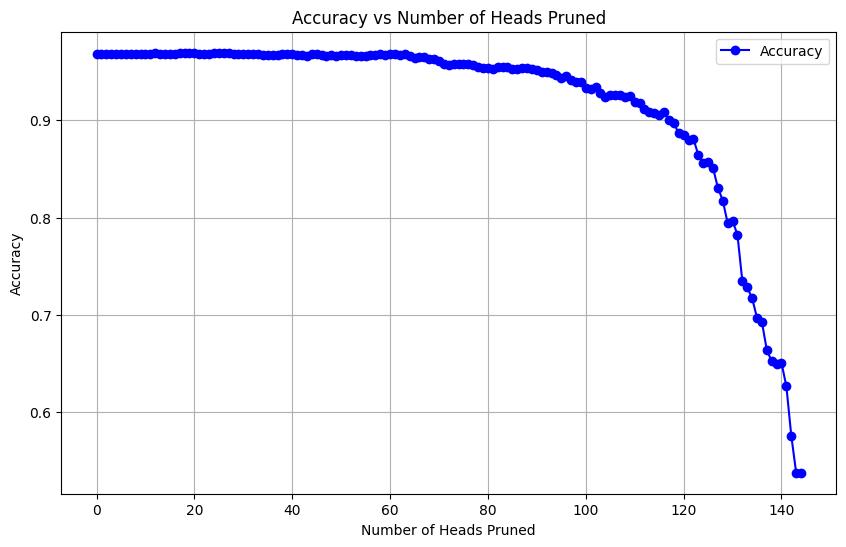

In [83]:
import matplotlib.pyplot as plt

# 假设你已经有剪头后的准确率 accs 列表
# accs 是你剪掉不同数量的头时的准确率，如 [0.90, 0.88, 0.85, ..., 0.70]
# 横坐标表示剪掉的头的数量，从 0 到剪掉头的总数
num_heads_pruned = list(range(len(accs)))

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制剪掉头数量与准确率的关系曲线
plt.plot(num_heads_pruned, accs, marker='o', linestyle='-', color='b', label='Accuracy')

# 添加标题和标签
plt.title("Accuracy vs Number of Heads Pruned")
plt.xlabel("Number of Heads Pruned")
plt.ylabel("Accuracy")

# 添加网格和图例
plt.grid(True)
plt.legend()

# 显示图表
plt.show()


In [84]:
import pandas as pd

# 假设 accs 是你已经计算好的准确率列表
# 例如：accs = [0.90, 0.88, 0.85, ...]

# 将准确率列表保存到 Pandas DataFrame 中
accs_df = pd.DataFrame({
    'Pruned_Heads': list(range(len(accs))),  # 剪掉头的数量
    'Accuracy': accs
})

# 将数据保存到 CSV 文件中
accs_df.to_csv('pruned_heads_accuracy(BERT)basedonGreedyGnorm.csv', index=False)


准确率列表已保存到 'pruned_heads_accuracy.csv' 文件中
